### PREDICTING MIGRATION TRENDS IN UTTARAKHAND 

#### Business Objective: Analyzing the migration Patterns in Different Distrits of Uttarakahnd.

In [35]:
# Importing Basic libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing dataset:
df = pd.read_csv('Migration Data.csv') 
df.head()

,Districts,Number_of_Hospitals,Avg_death_rate,ten_year_population_growth,ten_year_literacy_growth,total_educational_institutions,Unemployment_Rate,Rainfall_Normal(in_mm),rabi_hectares_per_tonne,kharif_hectares_per_tonne,rural_share,urban_share,uninhabited_villages,Migration_rate
0,Almora,229,0.125000,-0.01,0.08,347,0.12,792.3,0.825,0.829,0.91,0.09,127,0.1362
1,Bageshwar,90,0.124875,0.04,0.11,124,0.11,792.3,0.626,0.703,0.97,0.03,88,0.0497
2,Chamoli,122,0.125000,0.06,0.08,250,0.18,721.4,0.655,0.526,0.86,0.14,92,0.1200
3,Champawat,75,0.125000,0.16,0.12,137,0.19,1313.8,0.496,0.665,0.88,0.12,71,0.0600
4,Dehradun,197,0.125000,0.33,0.07,562,0.30,1442.9,0.393,0.450,0.51,0.49,19,0.0235


In [37]:
# Shape of the Dataset:
print('The dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

The dataset has 13 rows and 14 columns.


### Checking Datatypes

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Districts                       13 non-null     object 
 1   Number_of_Hospitals             13 non-null     int64  
 2    Avg_death_rate                 13 non-null     float64
 3   ten_year_population_growth      13 non-null     float64
 4   ten_year_literacy_growth        13 non-null     float64
 5   total_educational_institutions  13 non-null     int64  
 6   Unemployment_Rate               13 non-null     float64
 7   Rainfall_Normal(in_mm)          13 non-null     float64
 8   rabi_hectares_per_tonne         13 non-null     float64
 9   kharif_hectares_per_tonne       13 non-null     float64
 10  rural_share                     13 non-null     float64
 11  urban_share                     13 non-null     float64
 12  uninhabited_villages            13 non

### Check missing values

In [39]:
print(df.isnull().sum())

Districts                         0
Number_of_Hospitals               0
 Avg_death_rate                   0
ten_year_population_growth        0
ten_year_literacy_growth          0
total_educational_institutions    0
Unemployment_Rate                 0
Rainfall_Normal(in_mm)            0
rabi_hectares_per_tonne           0
kharif_hectares_per_tonne         0
rural_share                       0
urban_share                       0
uninhabited_villages              0
Migration_rate                    0
dtype: int64


### Rename columns to short and clean ones

In [52]:
df.rename(columns={'Districts':'Districts',                      
    'Number_of_Hospitals': 'Hospitals',
    'Avg_death_rate': 'DeathRate',
    'ten_year_population_growth': 'PopGrowth',
    'ten_year_literacy_growth': 'LiteracyGrowth',
    'total_educational_institutions': 'Education',
    'Unemployment_Rate': 'Unemployment',
    'Rainfall_Normal(in_mm)': 'Rainfall',
    'rabi_hectares_per_tonne': 'RabiYield',
    'kharif_hectares_per_tonne': 'KharifYield',
    'rural_share': 'RuralShare',
    'urban_share': 'UrbanShare',
    'uninhabited_villages': 'UninhabitedVillages',
    'Migration_rate': 'MigrationRate'
}, inplace=True)


### Checking duplicates

In [53]:

df.duplicated().sum()

0

### Describing the dataset

In [55]:
df.describe()

,Hospitals,Avg_death_rate,PopGrowth,LiteracyGrowth,Education,Unemployment,Rainfall,RabiYield,KharifYield,RuralShare,UrbanShare,UninhabitedVillages,MigrationRate
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,159.923077,0.124990,0.133077,0.097692,295.307692,0.156923,1164.615385,0.534231,0.578538,0.826923,0.173077,96.692308,0.076415
std,60.876188,0.000062,0.131046,0.032185,130.797799,0.072155,298.009586,0.184787,0.158662,0.140854,0.140854,96.700038,0.063564
min,75.000000,0.124875,-0.010000,0.050000,124.000000,0.020000,721.400000,0.254000,0.290000,0.510000,0.030000,15.000000,0.008000
25%,95.000000,0.125000,0.040000,0.080000,156.000000,0.110000,948.000000,0.393000,0.450000,0.700000,0.070000,45.000000,0.023500
50%,176.000000,0.125000,0.070000,0.100000,327.000000,0.160000,1151.200000,0.605000,0.623000,0.880000,0.120000,88.000000,0.060000
75%,197.000000,0.125000,0.250000,0.120000,351.000000,0.200000,1442.900000,0.626000,0.703000,0.930000,0.300000,107.000000,0.120000
max,248.000000,0.125125,0.340000,0.140000,562.000000,0.300000,1549.100000,0.825000,0.829000,0.970000,0.490000,390.000000,0.215000


### Distribution of Migration Rate with KDE Curve

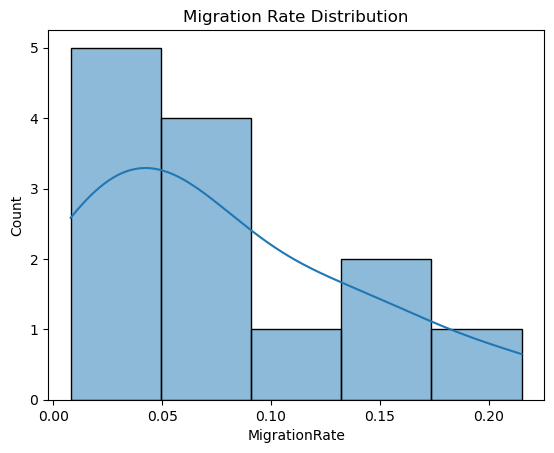

In [43]:
sns.histplot(df['MigrationRate'], kde=True)
plt.title('Migration Rate Distribution')
plt.show()


### Pairwise Relationships Between Variables in the Dataset

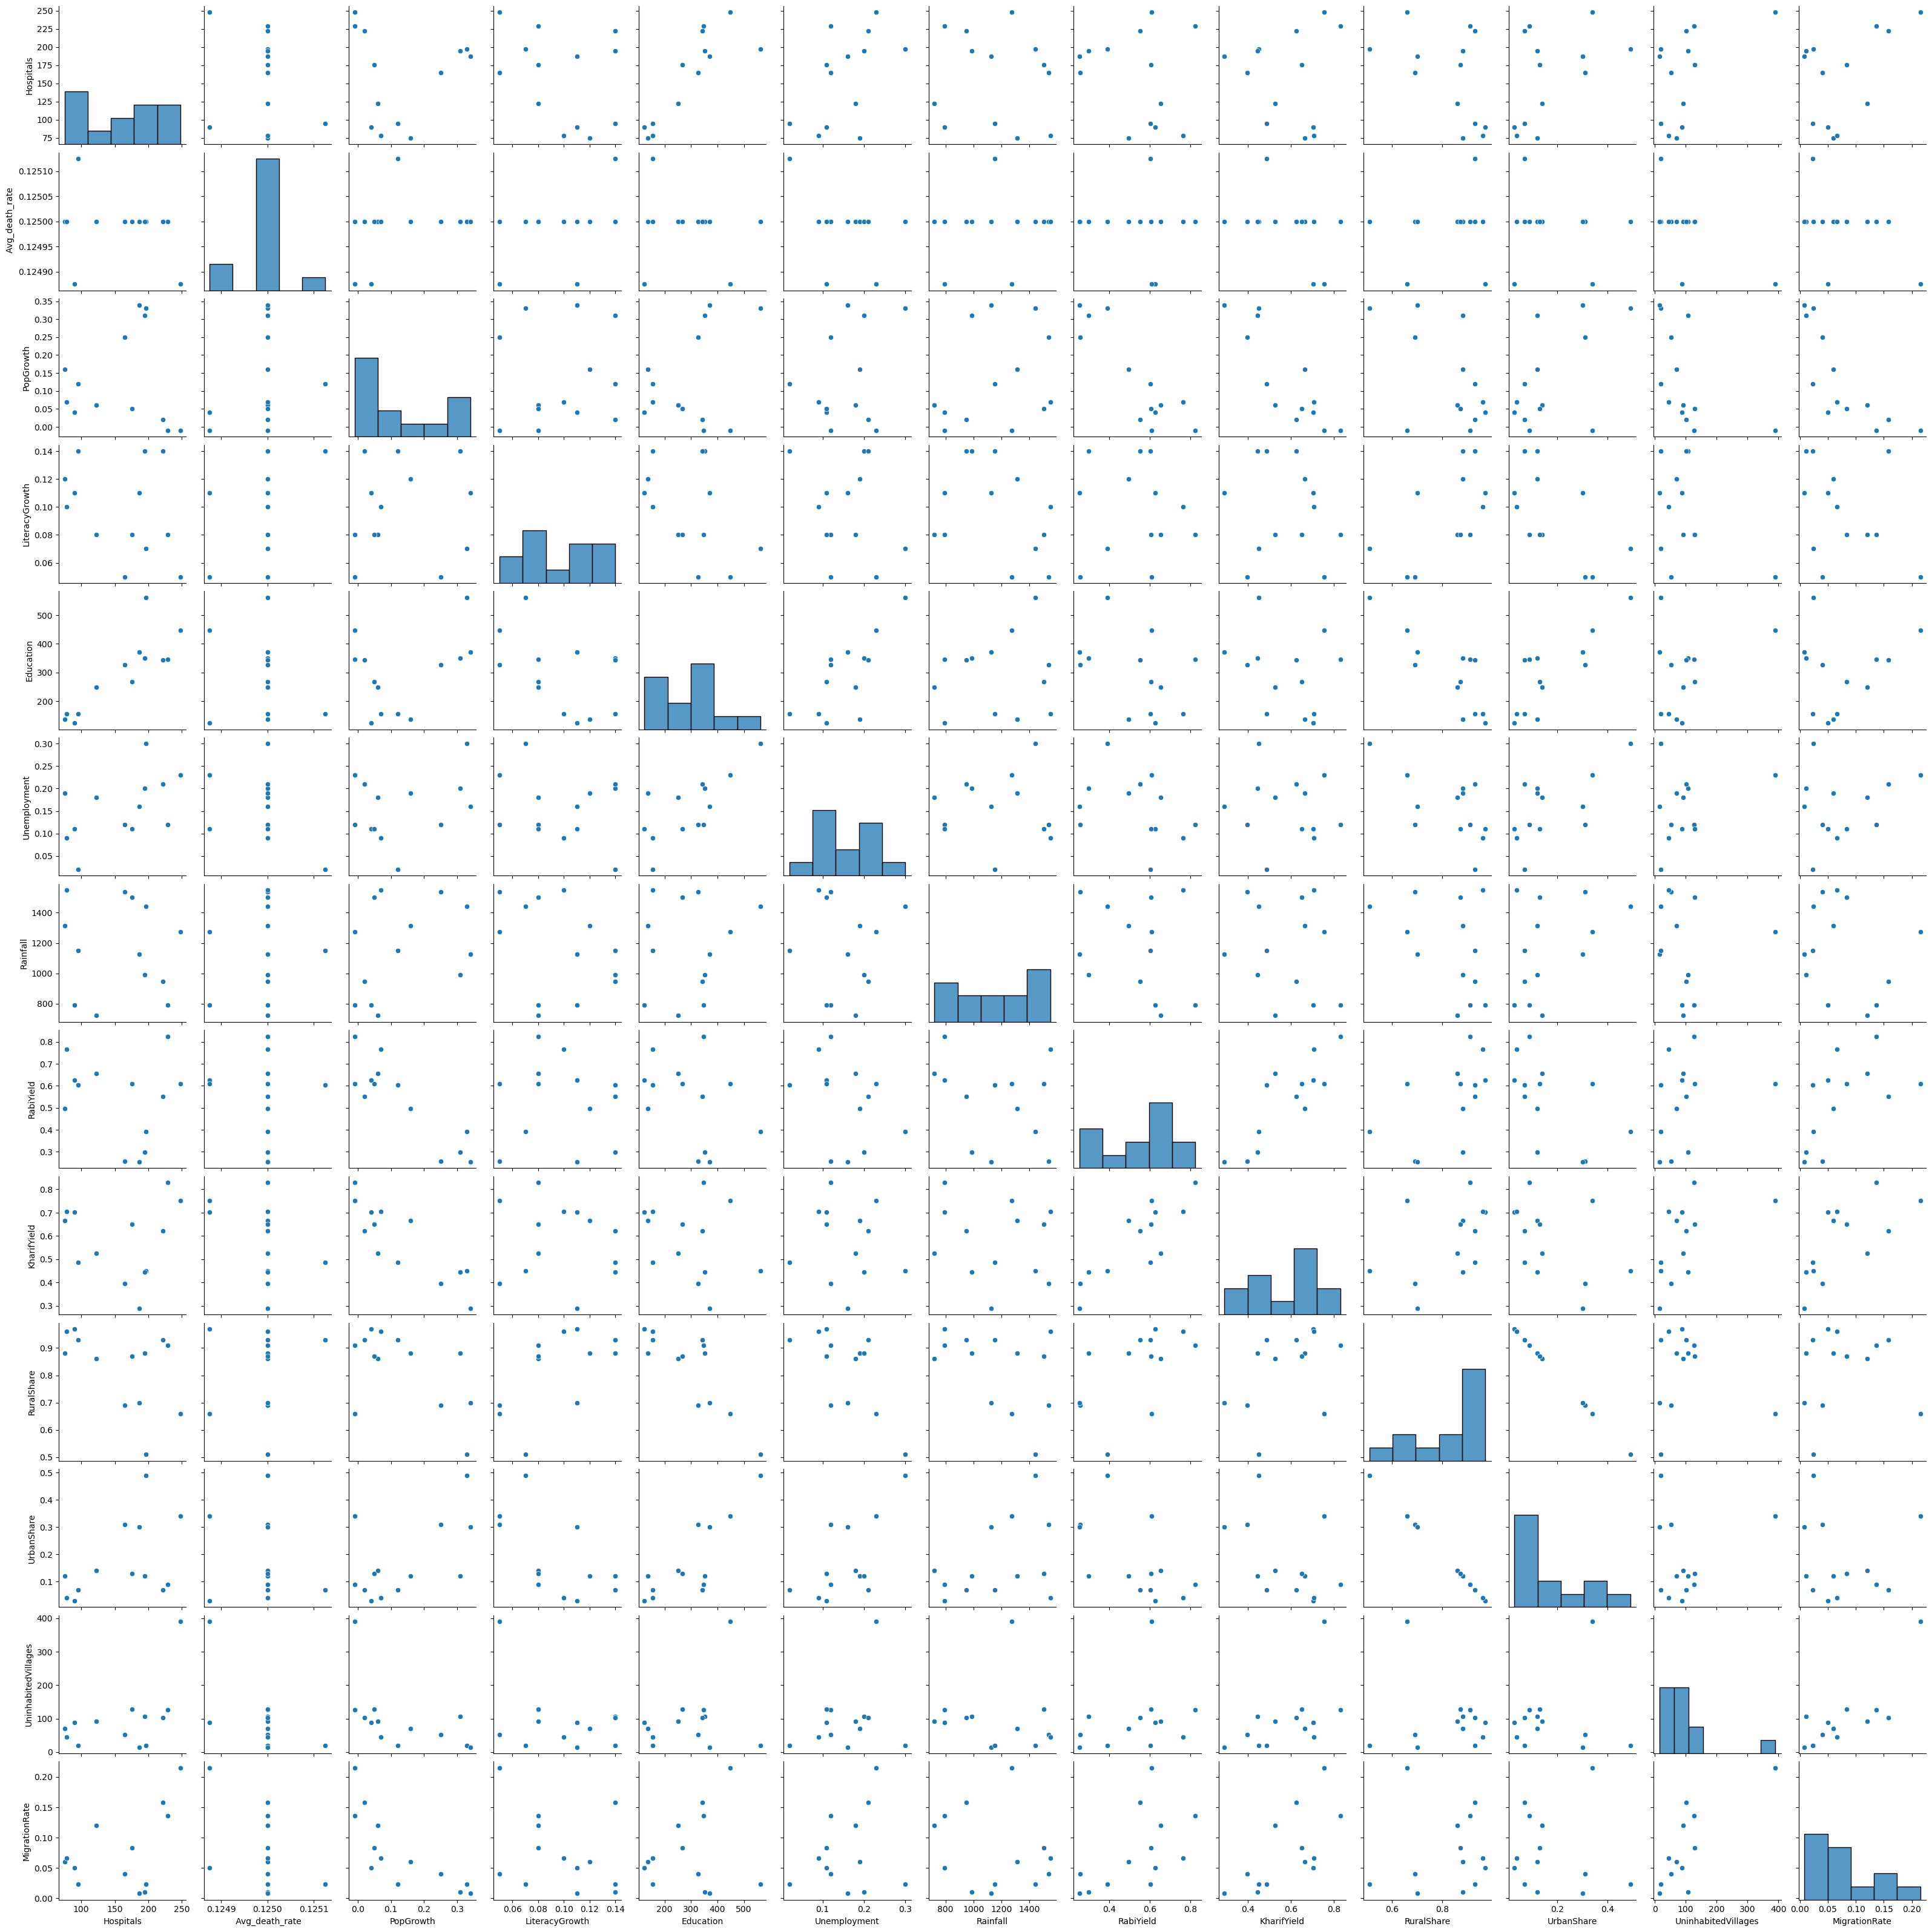

In [44]:
sns.pairplot(df)
plt.show()

### Correlation of Features with Migration Rate

In [45]:
correlation = df.drop('Districts', axis=1).corr()['MigrationRate'].sort_values(ascending=False)
print(correlation)


MigrationRate          1.000000
UninhabitedVillages    0.797825
KharifYield            0.675678
RabiYield              0.560534
Hospitals              0.455584
Unemployment           0.225383
Education              0.180277
RuralShare             0.067505
UrbanShare            -0.067505
Rainfall              -0.227729
LiteracyGrowth        -0.347476
 Avg_death_rate       -0.439312
PopGrowth             -0.784257
Name: MigrationRate, dtype: float64


### Creating Heatmap

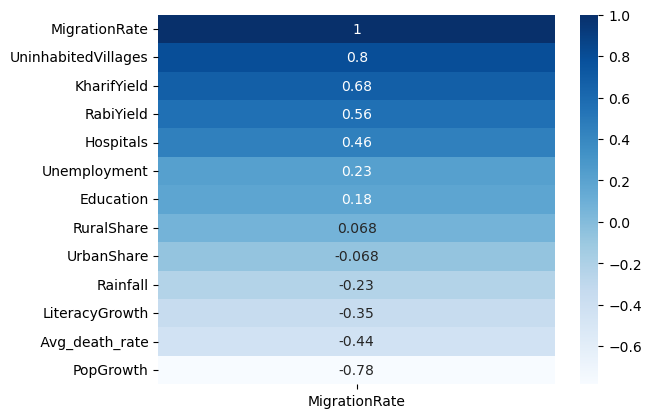

In [46]:
correlation_matrix = df.drop('Districts',axis=1).corr()
sns.heatmap(correlation_matrix[['MigrationRate']].sort_values(by='MigrationRate', ascending=False),
            annot=True, cmap='Blues')
plt.show()


### Observations:

### Positive correlation

| Feature               | Correlation | Meaning                                                                                   |
|-----------------------|-------------|-------------------------------------------------------------------------------------------|
|UninhabitedVillages | 0.79        | More empty villages → more people migrating out. Very strong signal.                     |
|KharifYield          | 0.67        | Higher crop yield during Kharif season → linked with migration.                           |
|RabiYield            | 0.56        | Same idea, agriculture productivity linked to movement.                                   |
|Hospitals            | 0.45        | More hospitals might mean better support — attracting people                               |


### Negative Correlation
| Feature         | Correlation | Meaning                                                                                      |
|-----------------|-------------|----------------------------------------------------------------------------------------------|
|PopGrowth     | -0.78       | Where population is growing, migration is lower.                                             |
|DeathRate     | -0.44       | Maybe places with lower death rate have lower migration                                     |
|LiteracyGrowth| -0.34       | Better literacy growth → less need to migrate.                                              |
|Rainfall      | -0.22       | Wetter areas possibly more agriculturally stable.                                           |


### Top Features by Absolute Correlation with Migration Rate

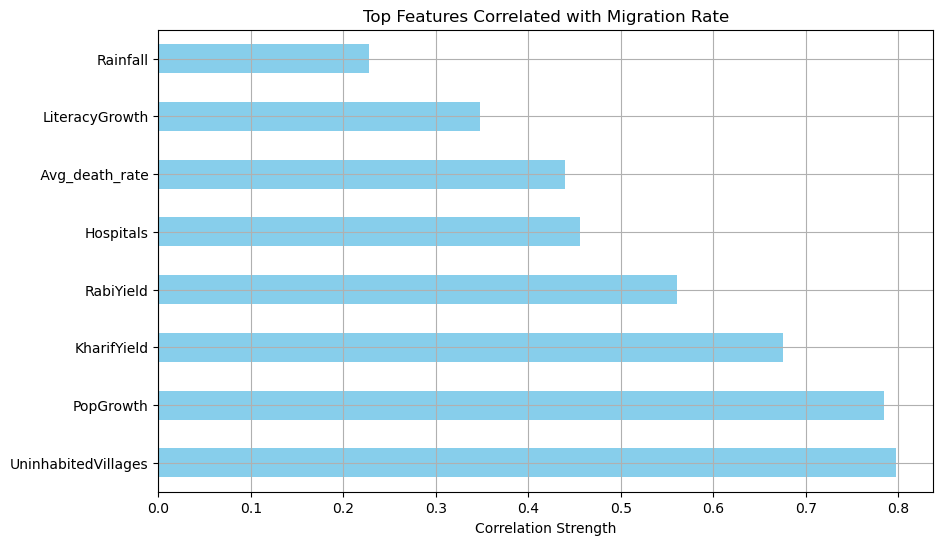

In [47]:
top_corr = correlation.drop('MigrationRate').abs().sort_values(ascending=False).head(8)

plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='skyblue')
plt.title('Top Features Correlated with Migration Rate')
plt.xlabel('Correlation Strength')
plt.grid(True)
plt.show()


## Model Building

In [49]:
#Importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [58]:
df.columns

Index(['Districts', 'Hospitals', ' Avg_death_rate', 'PopGrowth',
       'LiteracyGrowth', 'Education', 'Unemployment', 'Rainfall', 'RabiYield',
       'KharifYield', 'RuralShare', 'UrbanShare', 'UninhabitedVillages',
       'MigrationRate'],
      dtype='object')

In [60]:
features = [
    'UninhabitedVillages',
    'KharifYield',
    'RabiYield',
    'Hospitals',
    'Unemployment',
    'Education',
    'PopGrowth',
    'LiteracyGrowth']


In [61]:
X = df[features]
y = df['MigrationRate']


###  Split the data into training and testing sets


In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Train the Linear Regression model

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting on test data

In [64]:
y_pred = model.predict(X_test)

### Evaluating the model

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R² Score):", r2)

Mean Squared Error (MSE): 0.004582690468252904
R-squared (R² Score): -0.6677981335135807


### Training  Random Forest model

In [66]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Predicting and evaluating the model

In [67]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_train= rf_model.predict(X_train)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest MSE: 0.00033937500900000137
Random Forest R² Score: 0.8764898021168029


In [68]:
df['predicted_migration_rate']=np.append(y_pred_rf_train, y_pred_rf)

### Visualizing the model

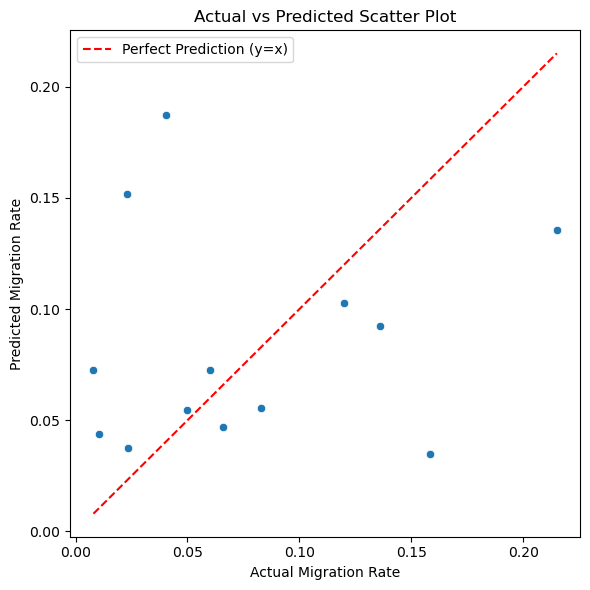

In [69]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='MigrationRate', y='predicted_migration_rate', data=df)
plt.plot([df['MigrationRate'].min(), df['MigrationRate'].max()],
         [df['MigrationRate'].min(), df['MigrationRate'].max()],
         'r--', label='Perfect Prediction (y=x)')
plt.xlabel("Actual Migration Rate")
plt.ylabel("Predicted Migration Rate")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.tight_layout()
plt.show()


### Get feature importance from the trained Random Forest model

In [70]:
importances = rf_model.feature_importances_
feature_names = X.columns

### Visualizing it

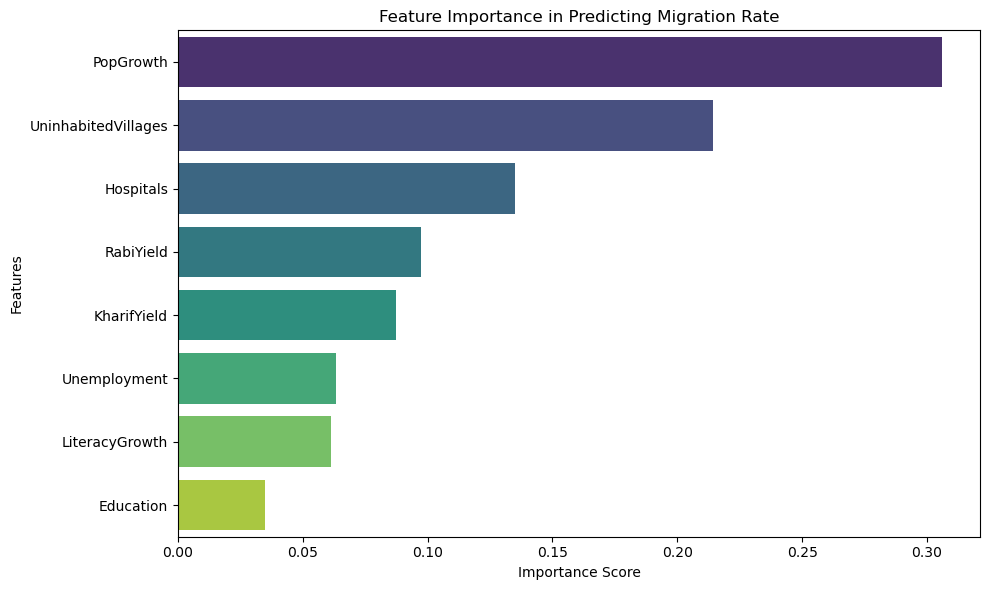

In [71]:
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Migration Rate')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Saving the model

In [72]:
import joblib
joblib.dump(rf_model, 'migration_predictor_model.pkl')


['migration_predictor_model.pkl']

In [73]:
df.to_excel('migration_data_final.xlsx')